In [1]:
#import libraries
import numpy as np
import scipy as scipy
from scipy import misc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## DATA PREPARATION & VISUALIZATION 

In [2]:
# Convert class labels to dictionary to work easily with DataFrames

class_labels = {
    "T-shirt/top" : 0,
    "Trouser" : 1,
    "Pullover": 2,
    "Dress" : 3,
    "Coat" : 4,
    "Sandal" : 5,
    "Shirt" : 6,
    "Sneaker" : 7,
    "Bag" : 8,
    "Ankle boot" : 9
}

In [3]:
# load the data
train = pd.read_csv('train-A2.csv')
test = pd.read_csv('test-A2.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 786 entries, Unnamed: 0 to pixel784
dtypes: int64(786)
memory usage: 179.9 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Columns: 786 entries, Unnamed: 0 to pixel784
dtypes: int64(786)
memory usage: 30.0 MB


In [6]:
train_reduced = train.sample(frac = 0.10, replace = False, random_state = 1)
train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10747 to 5262
Columns: 786 entries, Unnamed: 0 to pixel784
dtypes: int64(786)
memory usage: 18.0 MB


In [7]:
test_reduced = test.sample(frac = 0.10, replace = False, random_state = 1)
test_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2764 to 2048
Columns: 786 entries, Unnamed: 0 to pixel784
dtypes: int64(786)
memory usage: 3.0 MB


### Split data in x and y

In [8]:
# Create dependent and independent variables from train dataset, and convert it to DataFrame

train_x_a = pd.DataFrame(train_reduced)
train_x_a.drop(train_x_a.columns[[0, 1]], axis = 1, inplace = True)
train_y_ = train_reduced.iloc[:,1]
train_y = pd.DataFrame(train_y_)

In [9]:
# Create dependent and independent variables from test dataset, and convert it to DataFrame

test_x = pd.DataFrame(test_reduced)
test_x.drop(test_x.columns[[0, 1]], axis = 1, inplace = True)
test_y_ = test_reduced.iloc[:,1]
test_y = pd.DataFrame(test_y_)

In [10]:
train_y.reset_index(drop=True, inplace=True)

In [11]:
train_x_a.reset_index(drop=True, inplace=True)

In [12]:
print("train_x_a_images:", train_x_a.shape)
print("test_x_images:", test_x.shape)

train_x_a_images: (3000, 784)
test_x_images: (500, 784)


### Visualizing the data:

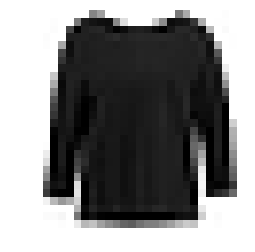

In [14]:
# Write a function plot_image that will take a pandas rows of pixels as input and plot the resulting 28x28 image.

def some_image(row):
    some_image = train_x_a.iloc[row,:]
    some_image_image = some_image.values.reshape(28, 28)
    plt.imshow(some_image_image, cmap = mpl.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()
    
some_image(32)

### Class visualization:

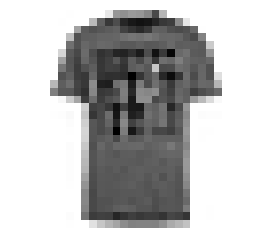

In [15]:
some_image(train_y.loc[train_y['label']==0].index.tolist()[18])

### Average visualization:

In [57]:
# Using the function written in (b), plot the average image for each class in the training set.
#The average image for each class is calculated by taking the mean of each pixel column for that class.

# for i in classes:
    # find mean image
    # plot it 

rows_to_plot = [train[train['label']==0].index.values.astype(int)]
rows_to_plot = [train[train['label']==1].index.values.astype(int)]
rows_to_plot = [train[train['label']==2].index.values.astype(int)]
rows_to_plot = [train[train['label']==3].index.values.astype(int)]
rows_to_plot = [train[train['label']==4].index.values.astype(int)]
rows_to_plot = [train[train['label']==5].index.values.astype(int)]
rows_to_plot = [train[train['label']==6].index.values.astype(int)]
rows_to_plot = [train[train['label']==7].index.values.astype(int)]
rows_to_plot = [train[train['label']==8].index.values.astype(int)]
rows_to_plot = [train[train['label']==9].index.values.astype(int)]

## BINARY CLASSIFICATION

### Binary transformation:

In [14]:
train_y_e = train_y.replace(to_replace = [0,1,2,3,4,6], value = 1)
train_y_e = train_y_e.replace(to_replace = [5,7,8,9],value = 0)


test_y_e = test_y.replace(to_replace = [0,1,2,3,4,6],value = 1)
test_y_e = test_y_e.replace(to_replace = [5,7,8,9],value = 0)
test_y_e.head()

,label
2764,1
4767,1
3814,0
3499,0
2735,1


### Binary Classification Model:

In [15]:
# Create a Logistic Regression model with default parameters. 
# Perform 5-fold Cross Validation on the training data and report the mean accuracy.


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(train_x_a, train_y_e)

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_x_a, train_y_e, cv=5, scoring="accuracy")

array([0.98835275, 0.99166667, 0.98666667, 0.98833333, 0.99499165])

### Predict test data:

In [16]:
# Train the model with train_x_a and train_y_e and predict the labels of test_x. 

# train the model
from sklearn.metrics import classification_report

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver="liblinear")
lr_model=lr_model.fit(train_x_a,train_y_e)

# Predicting the Test set results
y_pred = lr_model.predict(test_x)
print(y_pred)

# plot confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y_e, y_pred)
ac = accuracy_score(test_y_e, y_pred)
print(ac)
print(cm)

# print(accuracy, precision, recall, f1_score)
from sklearn.metrics import confusion_matrix

print(classification_report(test_y_e, y_pred))

[1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 0 

### Model evaluation:


In [17]:
# Plot the above model’s precision-recall curve and ROC curve. 
# Report the ROC area under the curve (AUC) score.

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_x_a, train_y_e, cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(train_y_e, y_train_pred)

array([[1195,   16],
       [  14, 1775]], dtype=int64)

In [18]:
y_train_perfect_predictions = train_y_e
confusion_matrix(train_y_e, y_train_perfect_predictions)

array([[1211,    0],
       [   0, 1789]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_y_e, y_train_pred)

0.9910664433277498

In [20]:
recall_score(train_y_e, y_train_pred)

0.9921743991056456

In [21]:
from sklearn.metrics import f1_score
f1_score(train_y_e, y_train_pred)

0.9916201117318436

In [22]:
y_scores = cross_val_predict(sgd_clf, train_x_a, train_y_e, cv=5,
                             method="decision_function")

In [23]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(train_y_e, y_scores)

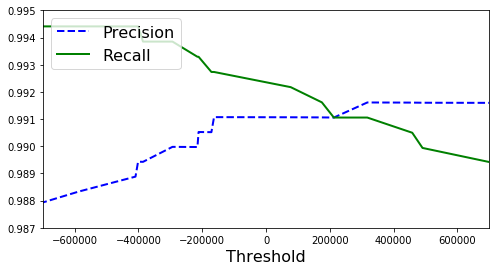

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0.987, 0.995])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [26]:
(y_train_pred == (y_scores > 0)).all()

True

In [27]:
y_train_pred_90 = (y_scores > 70000)

In [28]:
precision_score(train_y_e, y_train_pred_90)

0.9910664433277498

In [29]:
recall_score(train_y_e, y_train_pred_90)

0.9921743991056456

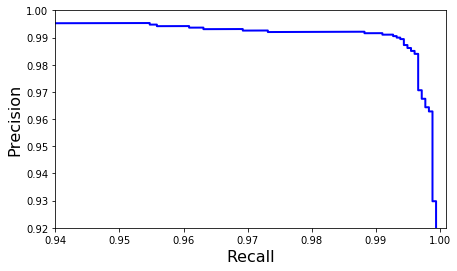

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.94,1.001, 0.92,1])

plt.figure(figsize=(7,4))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_y_e, y_scores)

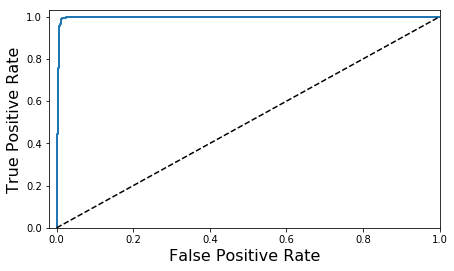

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.02, 1, 0, 1.03])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(7,4))
plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y_e, y_scores)

0.9964361528544703

### Learning curves:

In [34]:
# Evaluate using a train and a test set
model = LogisticRegression()
model.fit(train_x_a, train_y_e)
result = model.score(test_x, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 8.20%


In [35]:
# Plot the learning curve of a logistic regression model with default parameters by using train_x_a
# Increase the data size by 1000 at each step. For both train and validation, report classification accuracy
# Hint: You can take inspiration and modify funcitons from the book's chapter 4 codes in this question

# plot learning curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, train_x_a, train_y, axes=None, ylim=None, cv=3,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt    

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def plot_learning_curves (model, train_x_a, train_y):
    X_train, X_val, y_train, y_val = train_test_split(train_x_a, train_y, test_size=0.5, random_state=100)
    train_errors, val_errors = [], []
    for m in range(1, len(train_x_a)):
        model.fit(train_x_a[:m], train_y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(accuracy_score(train_y_e[:m], y_train_predict))
        val_errors.append(accuracy_score(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)          

In [37]:
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()
plot_learning_curves(sgd, train_x_a, train_y_e)
plt.axis([0, 80, 0, 3])                        
plt.show() 

NameError: name 'sgd' is not defined

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### Training and cross validating logistic regression:

In [38]:
# Use train_x_a and train_y to perform 3-fold cross validation on a logistic regressoin model with default parameters with cv=3
# Report the mean accuracy

# 3 fold Cross Validation on train_x_a and train_y

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="liblinear", random_state=42)
score = cross_val_score(log_clf, train_x_a, train_y, cv=3, verbose=3)
score.mean()
print(score.mean)

[CV]  ................................................................
[CV] ....................... , score=0.7716849451645065, total=   5.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] .................................... , score=0.767, total=   7.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


[CV] ....................... , score=0.7863590772316951, total=   7.0s
<built-in method mean of numpy.ndarray object at 0x000001C212FE6E90>


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.7s finished


In [39]:
# Use train_x_a and train_y to perform 3-fold cross validation on a logistic regressoin model with default parameters with cv=3
# Report the mean accuracy

# 3 fold Cross Validation on train_x_a and train_y

# 3 fold Cross Validation on train_x_a and train_y
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg2= LogisticRegression()

print(cross_val_score(logreg2, train_x_a, train_y,cv=3,scoring="accuracy").mean())

0.7750146741320671


### Testing logistic regression:

In [40]:
# Fit a logistic regression model on the training set ( train_x_a, train_y) and calculate its test accuracy by using test_x. 
# Print the model’s confusion matrix on the test set.

# fit model 
# test model
# print confusion matrix

# fit model 
# test model
# print confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_y_e, y_pred)
print(cm1)

[[202   1]
 [  7 290]]


## MULTICLASS CLASSIFICATION USING SVR

### Grid search to find best model:

In [ ]:
# In order to perform Multiclass Classification, you will need to utilize SVC. 
# However, SVC has large hyper parameter set. 
# To find the best combination you will be using gridsearch. 
# Using the below parameters, run GridSearchCV (cv = 5) with an SVC model on the train_x_a and train_y. 
# Print out the best model’s parameters and accuracy.

from sklearn import svm, datasets
from sklearn.svm import SVC
svm_reg = SVC()
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['linear', 'rbf','poly'],
               'C':[0.1, 0.5, 1, 5, 10],
              'tol': [0.0001, 0.001, 0.01],
              'decision_function_shape': ['ovo', 'ovr']}
]
grid_search = GridSearchCV(svm_reg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(train_x_a, train_y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

### Testing the best model:

In [ ]:
# Recreate a model using the best parameters in (l) and calculate its test accuracy. 
# Print the model’s confusion matrix on the test set.

# confusion matrix of dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, predictions)
print(cm)

In [ ]:
# fit model 
# test model
# print confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_y_e, y_pred)
print(cm1)

## MULTICLASS CLASSIFICATION USING DECISION TREES

### Grid Search to find best model:

In [ ]:
# Using the below parameters, run GridSearchCV (cv = 5) with a decision tree model on the train_x_a and train_y. 
# Print out the best model’s parameters and accuracy.

from sklearn import tree
X, y = train_x_a(return_X_y=True)
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
# After being fitted, the model can then be used to predict the class of samples:

clf.predict([[2., 2.]])
array([1])

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(test_x_a, test_y)
print(score)

### Testing the best model:

In [ ]:
# Recreate a model using the best parameters in (n) and calculate its test accuracy. 
# Print the model’s confusion matrix on the test set.

# calculate test accuracy
# print confusion matrix

# Use score method to get accuracy of model
score = logisticRegr.score(test_x_a, test_y)
print(score)

# confusion matrix of dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, predictions)
print(cm)